#### UCLA Extension Machine Learning

##### Spring Quarter 2021

# Final Project Report

## By Tara Nguyen

### Table of Contents

- [Problem](#Problem)
- [Data Set](#Data-Set)
  - [Data Wrangling](#Data-Wrangling)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Numeric Features](#Numeric-Features)
  - [Categorical Features](#Categorical-Features)
  - [Correlations](#Correlations)
  - [Target Distribution](#Target-Distribution)
- [Prosposed Solution](#Proposed-Solution)
- [Modeling](#Modeling)
- [Results](#Results)
  - [Stage 1 - Initial Models](#Stage-1-–-Initial-Models)
  - [Stage 2 - Grid Search for the Optimal Model Regularization](#Stage-2-–-Grid-Search-for-the-Optimal-Model-Regularization)
  - [Stage 3 - Examining the Selected Model](#Stage-3-–-Examining-the-Selected-Model)
- [Conclusion](#Conclusion)

---

## Problem

The aim of this project was to predict clients’ churning behavior – specifically, to find out factors that predict whether or not a client at a company will eventually stop using its services. This type of problem is important in business because companies want to identify clients who are likely to churn in the future, so the company can figure out how to keep them, for example, by making them special offers. For this project, I ran a few classification models and tried to select the one that best would best identify clients who churn.

## Data Set

The data set was downloaded from https://www.kaggle.com/radmirzosimov/telecom-users-dataset. It has 5986 rows (records) and 20 columns (features). Each row contains the following information about a client at a telecommunications company:

Index | Column/Feature name | Description
:-- | :-- | :--
0 | `gender` | Client gender – `Male` or `Female`
1 | `SeniorCitizen` | Whether or not the client is a senior citizen – `0` for no, or `1` for yes 
2 | `Partner` | Whether or not the client is married – `Yes` or `No`
3 | `Dependents` | Whether or not the client has dependents – `Yes` or `No`
4 | `tenure` | Number of months the client has been with the company
5 | `PhoneService` | Whether or not the client has telephone service – `Yes` or `No`
6 | `MultipleLines` | Are multiple phone lines connected? – `Yes`, `No` (i.e., only one line connected), or `No phone service`
7 | `InternetService` | Type of Internet service – `DSL`, `Fiber optic`, or `No` (i.e., no Internet service)
8 | `OnlineSecurity` | Is the online security service connected? – `Yes`, `No`, or `No internet service`
9 | `OnlineBackup` | Is the online backup service activated? – `Yes`, `No`, or `No internet service`
10 | `DeviceProtection` | Does the client have equipment insurance? – `Yes`, `No`, or `No internet service`
11 | `TechSupport` | Is the technical support service connected? – `Yes`, `No`, or `No internet service`
12 | `StreamingTV` | Is the TV streaming service connected? – `Yes`, `No`, or `No internet service`
13 | `StreamingMovies` | Is the movie streaming service activated? – `Yes`, `No`, or `No internet service`
14 | `Contract` | Type of customer contract – `Month-to-month`, `One year`, `Two year`
15 | `PaperlessBilling` | Whether or not the client uses paperless billing – `Yes` or `No`
16 | `PaymentMethod` | Payment method – `Bank transfer (automatic)`, `Credit card (automatic)`, `Electronic check`, or `Mailed check`
17 | `MonthlyCharges` | Monthly payment
18 | `TotalCharges` | Total amount that the client has paid for the services
19 | `Churn` | Whether or not the client churned – `Yes` or `No`

### Data Wrangling

The `TotalCharges` column was encoded as strings even though it was supposed to be floats, so I had to convert the data type. Before that, I replaced missing `TotalCharges` entries with `0`; this is because such entries correspond to clients who have been with the company for less than a month and therefore have not made any payment.

After that the data set was split into a training set and a test set at 80:20 ratio, i.e., the test set comprised 20% of the full data set.

Before any analysis could be done, I preprocessed the training set by standardizing the numeric features and one-hot encoding the categorical features. The final, preprocessed training set had 4788 samples with 30 features.

## Exploratory Data Analysis

Any exploratory data analysis (EDA) was done only on the preprocessed training set.

### Numeric Features

There are three numeric features: `tenure`, `MonthlyCharges`, and `TotalCharges`. In the following figure, they are plotted against one another, and a histogram of the distribution of each feature is also shown. Note that these features came from the preprocessed training set, so they were standardized, i.e., the zero value denoted the feature mean. We observe that:
- Most of the total charges were below average.
- `tenure` and `TotalCharges` correlated positively with each other: as the number of months a client had been with the company increased, so did the total payment. This was an expected relationship.
- `TotalCharges` also seemed to have a positive correlation with `MonthlyCharges`, but it's probably not as strong as the relationship with `tenure`.

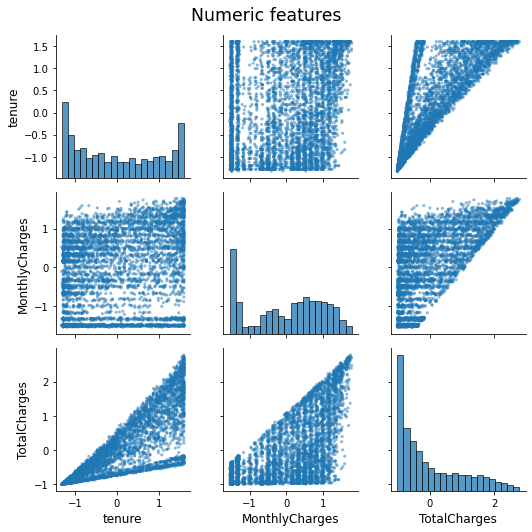

We can also see how these features were distributed for each churn group (churn versus no churn), as shown in the figure below. Compared to clients who did not churn, clients who churned used the services for shorter durations, paid slightly more per month, and paid very slightly less in total. The lower total charges might be a result of the shorter tenure.

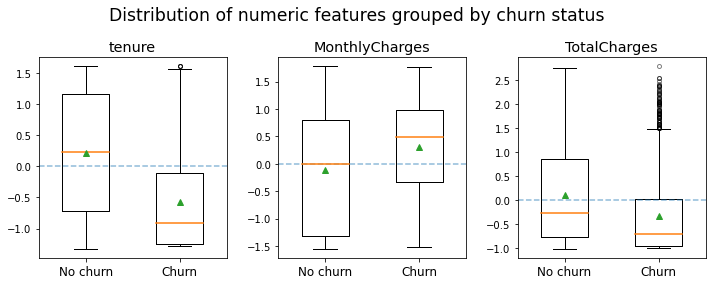

### Categorical Features

For each of the 27 categorical features in the preprocessed training set, I computed the proportion of clients in each churn group and plotted all the proportions:

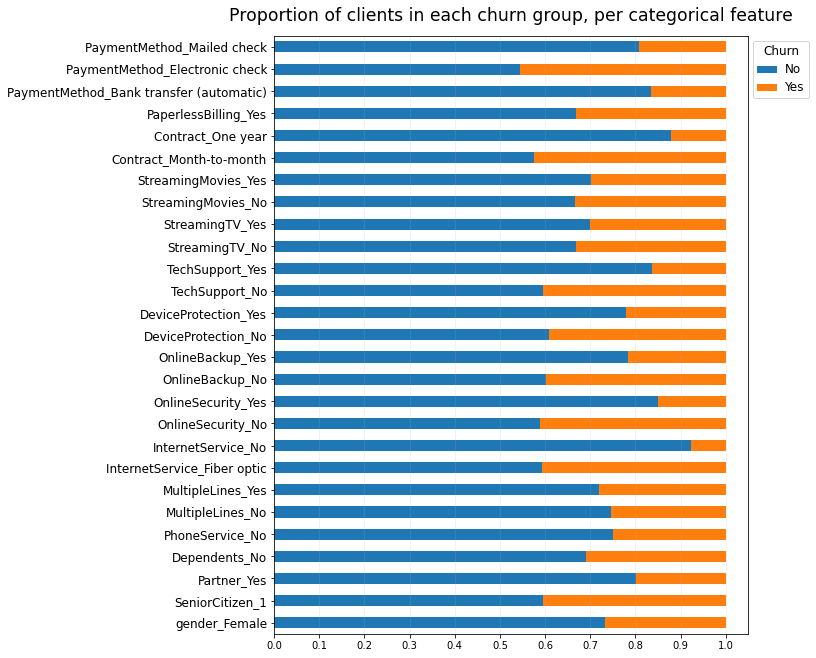

I then checked the differences in the proportions between the churn groups to get a sense of which features might be important in predicting churning behavior. The top five features were:
- `InternetService_No` – having no Internet service
- `Contract_One year` – being in a one-year contract
- `OnlineSecurity_Yes` – having online security service
- `TechSupport_Yes` – having technical support service
- `PaymentMethod_Bank transfer (automatic)` – paying by bank transfer.

### Correlations

A plot of the correlation matrix is shown in the following figure. Again we see the positive correlationships that `TotalCharges` had with `tenure` and with `MonthlyCharges`. One thing that stands out from the correlation matrix is that client gender did not correlate with any of the other features, suggesting that it might not play any role in predicting churning behavior.

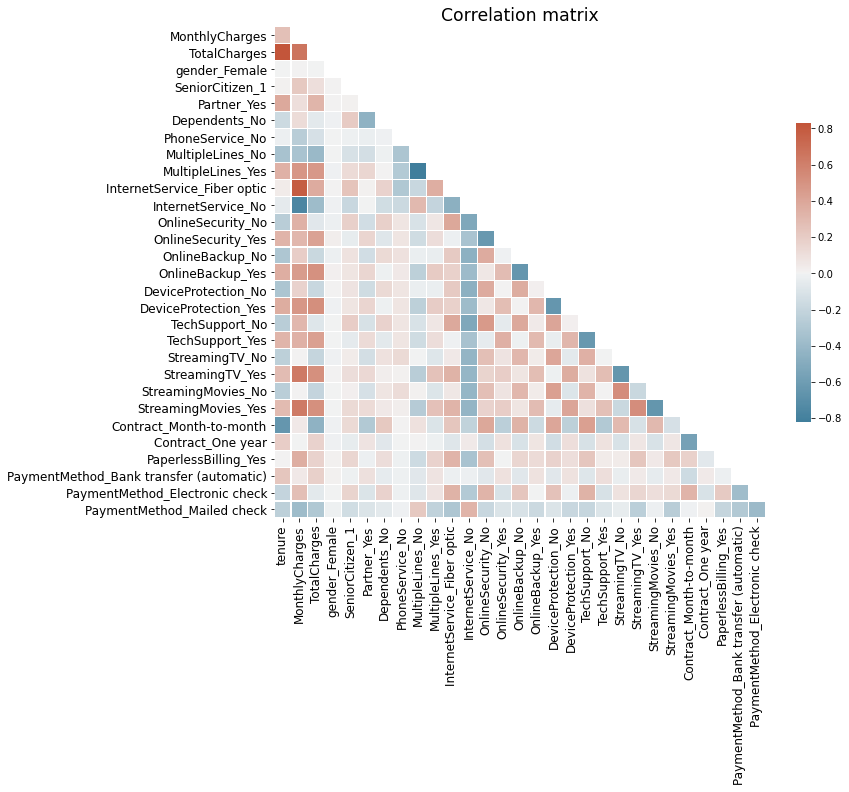

### Target Distribution

Before training models on the training set, I noted that the data are imbalanced: there were almost three times as many customers who did not churn as there were customers who did churn. This is shown in the pie chart below:

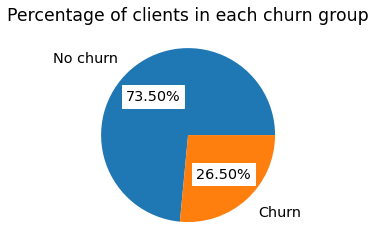

## Proposed Solution

My plan was to carry out the modeling process in three main stages:
1. Run a few simple models and picked one of them.
2. With the model just selected, perform a grid search for the best regularization parameter.
3. Examine the model selected by the grid search.

Because this is a classification problem, the metrics used to measure model performance were accuracy, precision, recall, and F-score. Because it is important that clients who churned were correctly classified, I focused more on recall than on precision. Therefore, the F-score I used was $F_\beta$ with $\beta = 2$, i.e., recall was considered twice as important as precision. $F_\beta$, along with recall, would be the main measure of success in the end.

## Modeling

In the first stage of the modeling process, I ran three models: Logistic Regression, Support Vector Classification (SVC) with Stochastic Gradient Descent (SGD) training, and SVC (using the radial basis function kernel) without SGD training. I picked them because they allow us to control the degree of model regularization and don't have many hyperparameters to tune. Logistic Regression is a linear model whereas the other two are nonlinear, so by running these models I could also see if the problem could be solved using a linear model.

For each model, first I performed cross-validation on the training set, which gave me an estimate of the model’s generalization performance. Then I used the model to make predictions for the test set and measured the performance. After those two steps were done for all 3 models, I compared the results and picked one model for the next stage.

With the model just selected, I performed a grid search for the optimal model regularization. For the regularization parameter I used 11 exponentially spaced values, ranging from $10^-2$ to $10^2$. The $F_\beta$ score  score was used as the deciding metric in ranking the models.

The last stage of the modeling process was to examine the model selected by the grid search. Just like in the first stage, I performed cross-validation on the training set and then measured the quality of model inference on the test set.

## Results

### Stage 1 – Initial Models

The figure below compares the results of performing cross-validation using the three initial models. We can make a few observations:
- The SVC model took much longer to run than did the other two models.
- The SVC model performed the best at training, but did not perform as well at inference time, suggesting that this model slightly overfit the data.
- In general the SVC with SGD model performed the worst at both training and inference time, suggesting that it underfit the data.
- The Logistic Regression model performed equally well (in terms of the F-score and recall) on both sets.

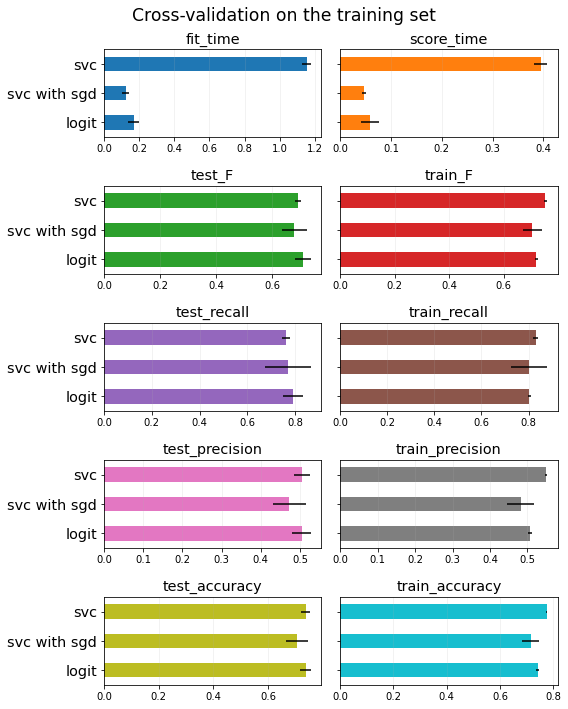

The next figure shows the scores on the test set. Again, in terms of $F_\beta$ and recall, the SVC with SGD model performed the worst whereas the Logistic Regression model performed the best.

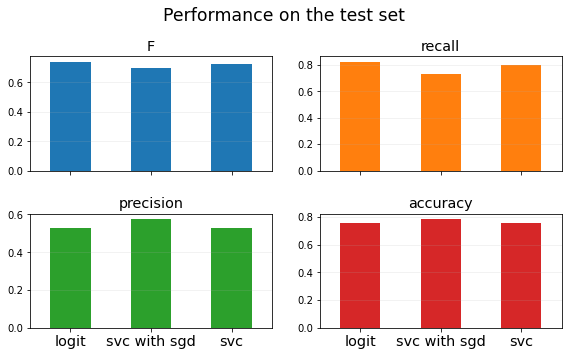

I therefore picked the Logistic Regression for the next stage – grid search for the optimal model regularization.

### Stage 2 – Grid Search for the Optimal Model Regularization

The training scores and test scores produced by the grid search with the Logisitc Regression model selected in Stage 1 were plotted against the regularization parameter $C$. The filled areas denote the standard deviations, and the vertical red lines are where the optimal value for C was found. This optimal value was $C = 15.85$, signifying rather weak regularization.

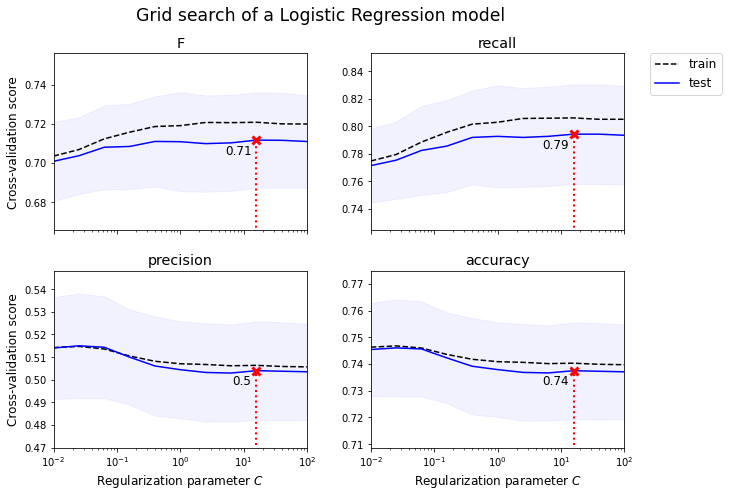

### Stage 3 – Examining the Selected Model

The results of cross-validating the model selected by the grid search are shown in the following figure. The scores were approximately the same for the (reduced) training set  as they were for the validation set. Both the $F_\beta$ score (training: $.72$; validation: $.71$) and recall (training: $.81$; validation: $.79$) were pretty high, suggesting that the model generalized quite well.

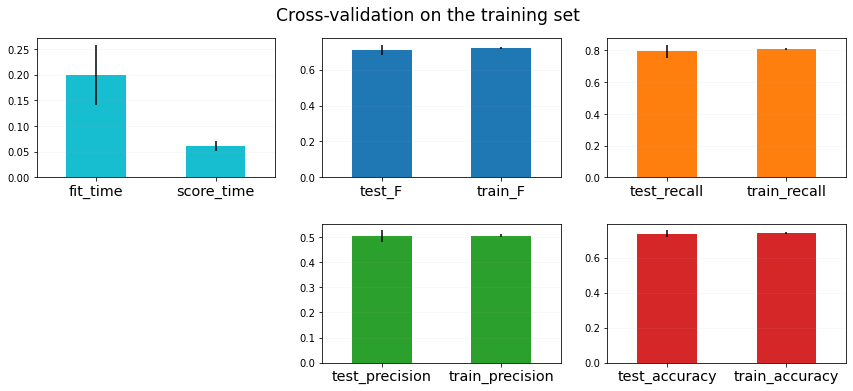

The scores on the test set (figure below) further supports the observation that the model generalized well, and might even underfit the training set, considering that the test scores were even higher than the cross-validation scores.

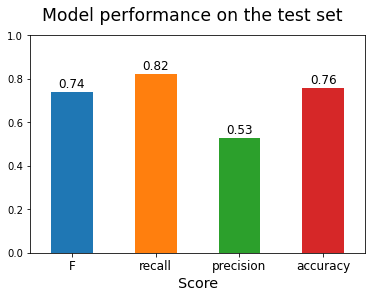

The model has an intercept of $-3.79$. The feature weights are shown in the figure below. We can make a few observations:
- Contract duration could predict churning behavior: the shorter the contract duration was, the more likely the client was to churn.
- Interestingly, clients who had TV/movie streaming service seemed to be more likely to churn than those who didn’t have such service.
- Also interesting was that having no Internet service reduced the likelihood of churning compared to having Internet service. Also the type of Internet service could predict churning behavior, with clients using fiber optic more likely to churn than those using DSL.
- The two types of payment amount were associated with churning behavior in opposite ways: larger total amounts paid were associated with higher likelihood of churning than were smaller total amounts, whereas larger monthly payments were associated with lower likelihood of churning than were smaller monthly payments.
- Clients who had been with the company for longer periods of time were less likely to churn than newer clients.

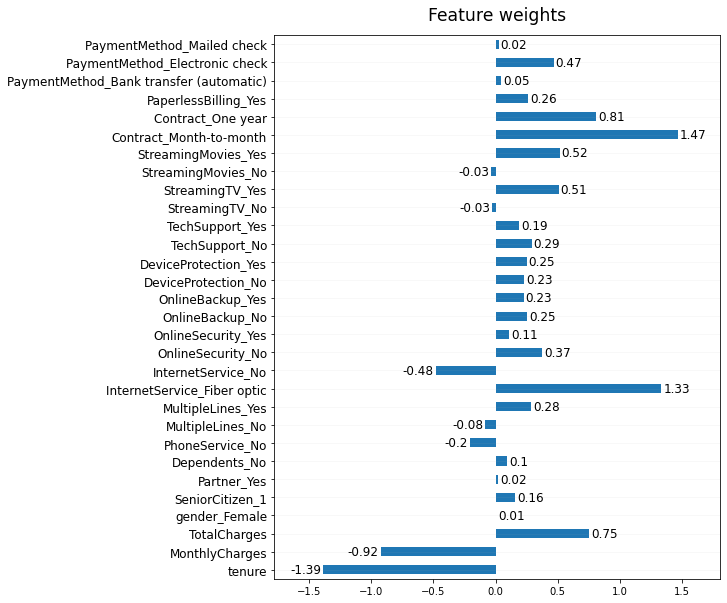

## Conclusion

In conclusion, I picked a weakly regularized Logistic Regression model for the problem of predicting churning behavior. The model was very fast, it could be used even if there were time constraints. However, the model was able to correctly classify clients who churned only about 80% of the time on average, so it’s not exactly a great model for this type of problem. We also need to be careful when interpreting the model, because some features correlated with one another (as shown by the [correlation matrix](#Correlations)).